In [35]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import time
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get("http://taqm.epa.gov.tw/taqm/tw/MonthlyAverage.aspx")

selectSite = Select(browser.find_element_by_id("ctl05_ddlSite"))
selectSite.select_by_value('58')

selectYear = Select(browser.find_element_by_id("ctl05_ddlYear"))
selectYear.select_by_value('2010')
    
browser.find_element_by_id('ctl05_btnQuery').click()

In [54]:
html_source = browser.page_source
soup = BeautifulSoup(html_source, 'html.parser')
table = soup.find('table', class_='TABLE_G')
data={}
desc={}

In [57]:
for tag in table.find_all('td'):
    if 'class' in tag.attrs and 'style' in tag.attrs:
        name=tag.text
        data[name]={}
        desc[name]={}
    elif  'class' in tag.attrs and not 'style' in tag.attrs:
        unit=tag.text
        desc[name][unit]='True'
    else:
        if re.compile("\d{4}\/\d{2}").match(tag.text):
            date=tag.text
            data[name][date]={}
        elif re.compile("\d+").match(tag.text):
            value=tag.text
            data[name][date]=value

In [59]:
hisdata=pd.DataFrame(data)
print(hisdata)
desc=pd.DataFrame(desc)
desc.fillna('False')
print(desc)
hisdata['SO2'] = hisdata['SO2'].astype(float)
hisdata['CO'] = hisdata['CO'].astype(float)
hisdata['O3'] = hisdata['O3'].astype(float)
hisdata['PM10'] = hisdata['PM10'].astype(float)
hisdata['NOx'] = hisdata['NOx'].astype(float)
hisdata['NO'] = hisdata['NO'].astype(float)
hisdata['NO2'] = hisdata['NO2'].astype(float)
hisdata['THC'] = hisdata['SO2'].astype(float)
hisdata['NMHC'] = hisdata['NMHC'].astype(float)
hisdata['CH4'] = hisdata['CH4'].astype(float)

           SO2    CO     O3 PM10    NOx     NO    NO2   THC  NMHC   CH4
2010/01  13.70  0.83  25.30  107  55.17  15.88  39.30  2.34  0.41  1.92
2010/02  11.30  0.69  21.10   71  42.87  12.65  30.22  2.20  0.31  1.88
2010/03     13  0.57  29.40  109  36.37   7.55  28.82  2.11  0.27  1.84
2010/04  12.40  0.57  29.40   92  36.75   8.48  28.28  2.12  0.27  1.84
2010/05  10.90  0.37  31.20   68  25.12   6.36  18.75  1.90  0.15  1.76
2010/06   8.80  0.32  22.50   48  24.65   9.15  15.50  1.88  0.17  1.72
2010/07   7.40  0.27  18.30   37  23.07   8.78  14.29  1.86  0.17  1.69
2010/08   8.70  0.33  22.10   43  23.75   6.89  16.85  1.90  0.19  1.71
2010/09  13.60  0.51  25.90   54  28.01   9.71  18.30  1.93  0.20  1.73
2010/10  10.90  0.54  34.60   78  31.97   6.71  25.27  2.07  0.28  1.79
2010/11  11.50  0.68  27.30  108  43.63   9.76  33.89  2.19  0.37  1.81
2010/12     12  0.75     26  107  48.76  10.98  37.80  2.22  0.40  1.83
        SO2    CO    O3  PM10   NOx    NO   NO2   THC  NMHC   CH

<Figure size 720x576 with 0 Axes>

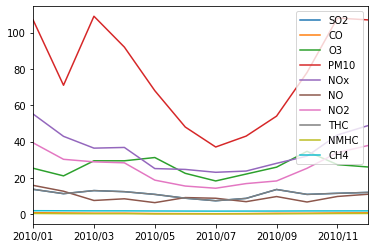

In [24]:
plt.figure(figsize=(10, 8))
hisdata[['SO2','CO','O3','PM10','NOx','NO','NO2','THC','NMHC','CH4']].plot()
plt.legend(loc="upper right")
plt.show()